In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from numpy import nan
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [12]:
# загружаем данные
# координаты домов
points = gpd.read_file('shapes/coordinates/coordinates.shp', encoding='utf-8').set_index('index')
points2 = gpd.read_file('shapes/corr/corr.shp', encoding='utf-8').set_index('idx')
points = points.append(points2)
# данные о домах
data = pd.read_csv('data/housing_data.csv')
data = data.drop(15518)
# карта муниципальных образований
grid = gpd.read_file('shapes/grid500/grid500.shp', encoding='utf-8')
grid.crs
grid = grid.to_crs(epsg=4326)

/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [13]:
# отбираем интересующие данные из датасета
gas = data[['eng_gascentral', 'eng_gasnoncentral']]
gas = gpd.GeoDataFrame(gas.join(points), geometry='geometry', crs={'init': 'epsg:4326'})
gas = gpd.sjoin(grid, gas, op='contains')

/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326', 'no_defs': True} != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/geopandas/plotting.py:494: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


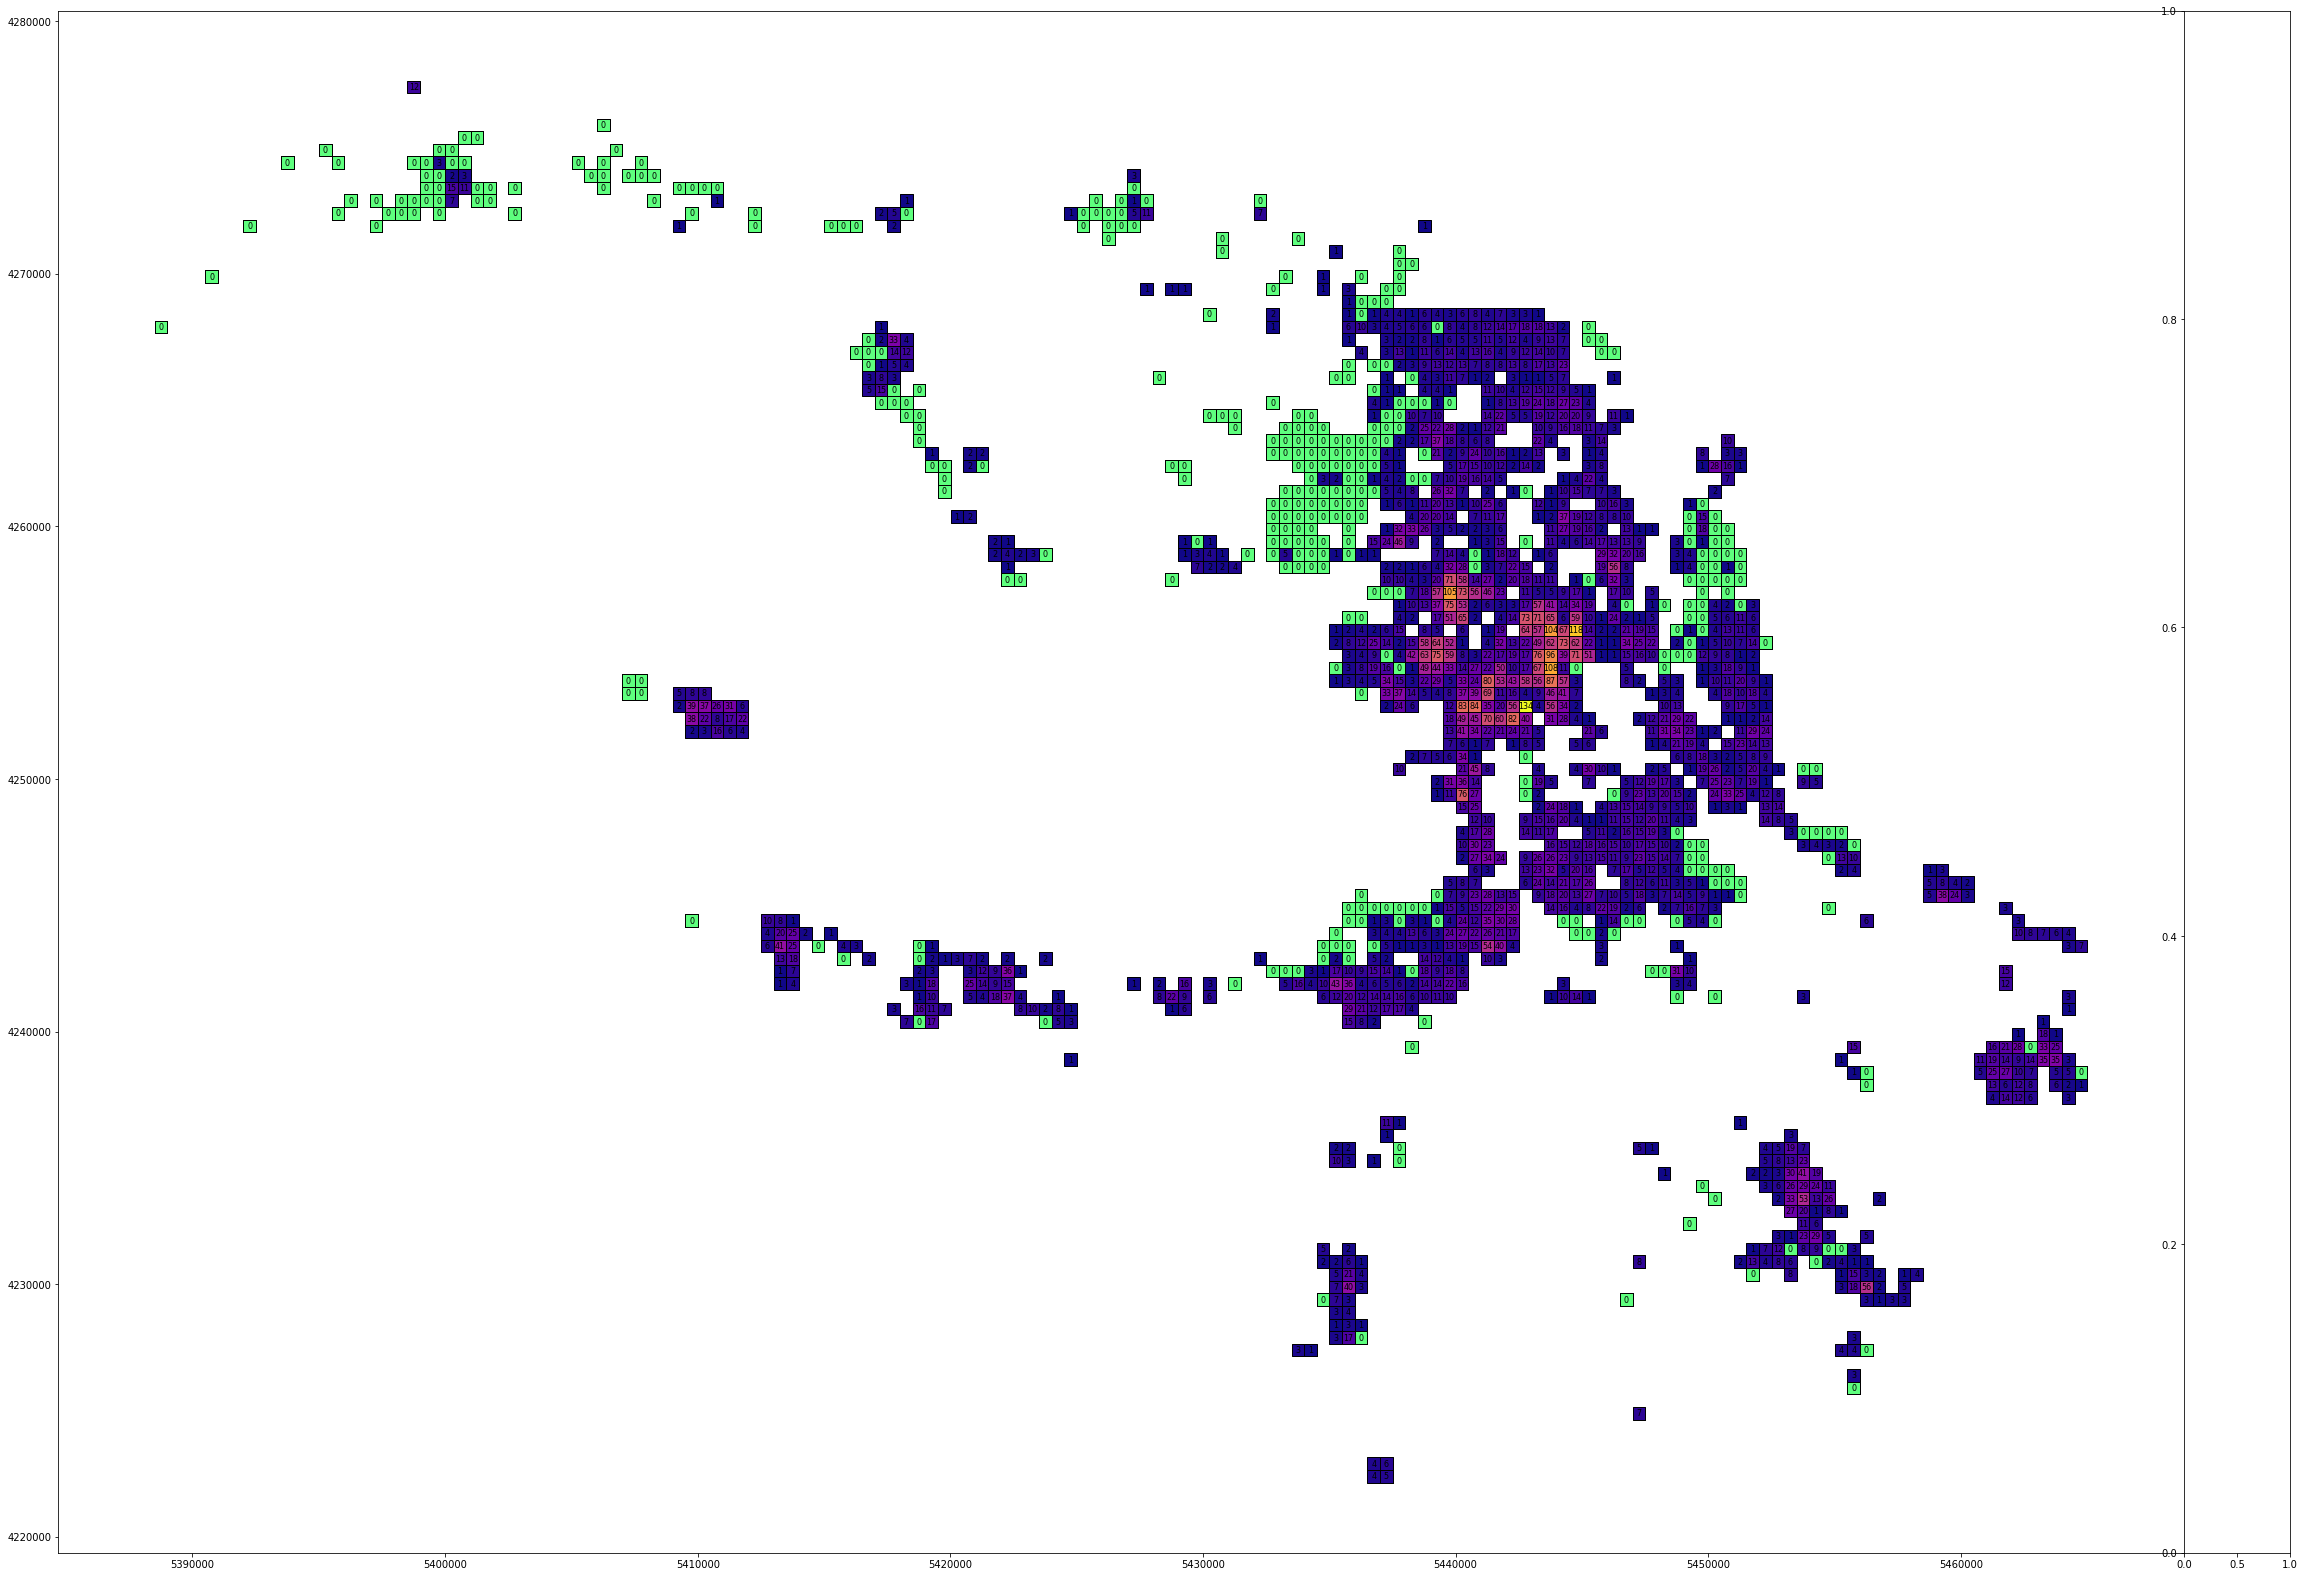

In [14]:
gas = gas.groupby('FID').sum()
# storeys_count = population.groupby('FID').count()
# storeys_sum['avg_storeys'] = storeys_sum['data_storeys'] / storeys_count['data_storeys']

gas = grid.join(gas)
gas = gpd.GeoDataFrame(gas, geometry='geometry', crs={'init': 'epsg:4326'})
gas = gas.to_crs(epsg=3035)
# выводим карту, регулируем размер легенды
fig, ax = plt.subplots(1, 1, figsize=(40, 60))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%")

gas['coords'] = gas['geometry'].apply(lambda x: x.representative_point().coords[:])
gas['coords'] = [list(coords[0]) for coords in gas['coords']]

gas[(gas['eng_gascentral'].notna())].plot(column='eng_gascentral', ax=ax, 
                                                cmap='plasma',
                                               edgecolor='k', legend=False)
gas[(gas['eng_gascentral'].notna()) & (gas['eng_gascentral'] == 0)].plot(column='eng_gascentral', ax=ax, 
                                                 color='#5eff7e',
                                               edgecolor='k', legend=False)

for idx, row in gas[(gas['eng_gascentral'].notna())].iterrows():
    try:
        ax.annotate(s=str(int(row['eng_gascentral'])), xy=(row['coords'][0], row['coords'][1]), 
                    verticalalignment='center',
                     horizontalalignment='center', fontsize=8,
                     clip_on=True)
    except Exception:
        pass
plt.show()

In [93]:
# отбираем интересующие данные из датасета
gas = data[['eng_gascentral', 'eng_gasnoncentral']]
gas = gpd.GeoDataFrame(gas.join(points), geometry='geometry', crs={'init': 'epsg:4326'})
gas = gpd.sjoin(grid, gas, op='contains')

/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326', 'no_defs': True} != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/geopandas/plotting.py:494: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


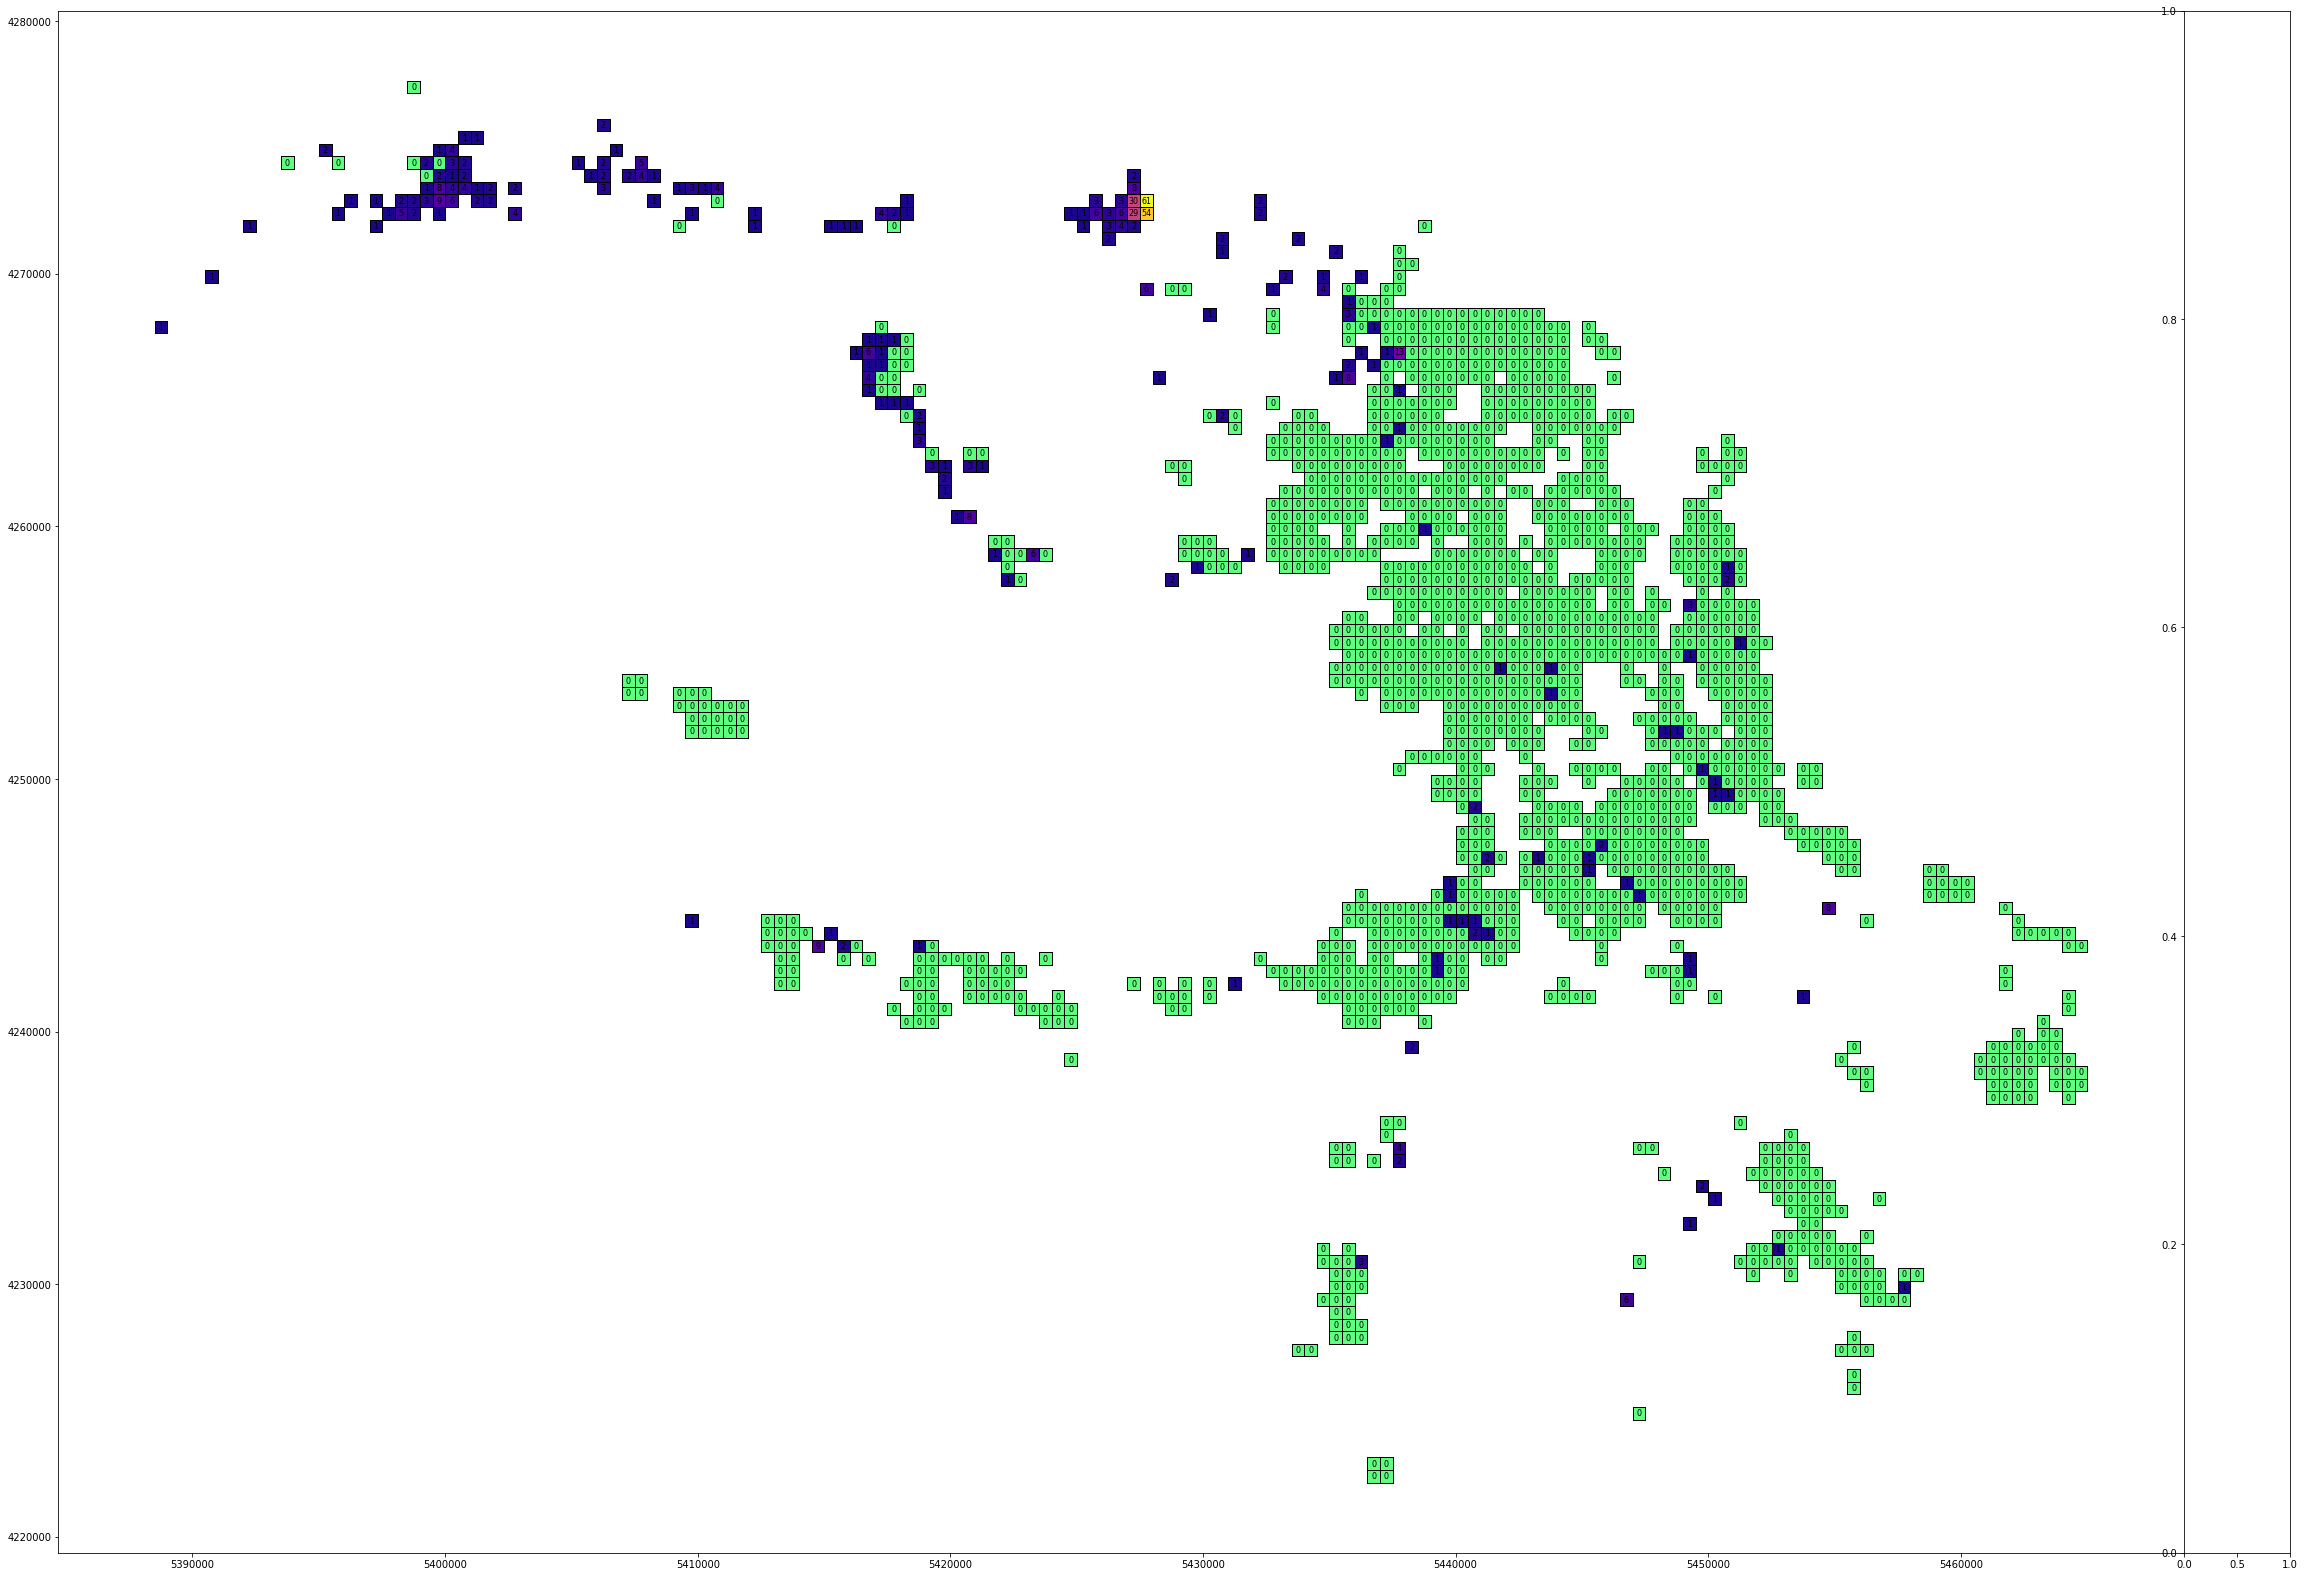

In [94]:
gas = gas.groupby('FID').sum()
# storeys_count = population.groupby('FID').count()
# storeys_sum['avg_storeys'] = storeys_sum['data_storeys'] / storeys_count['data_storeys']

gas = grid.join(gas)
gas = gpd.GeoDataFrame(gas, geometry='geometry', crs={'init': 'epsg:4326'})
gas = gas.to_crs(epsg=3035)
# выводим карту, регулируем размер легенды
fig, ax = plt.subplots(1, 1, figsize=(40, 60))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%")

gas['coords'] = gas['geometry'].apply(lambda x: x.representative_point().coords[:])
gas['coords'] = [list(coords[0]) for coords in gas['coords']]

gas[(gas['eng_gasnoncentral'].notna())].plot(column='eng_gasnoncentral', ax=ax, 
                                                cmap='plasma',
                                               edgecolor='k', legend=False)
gas[(gas['eng_gasnoncentral'].notna()) & (gas['eng_gasnoncentral'] == 0)].plot(column='eng_gasnoncentral', ax=ax, 
                                                 color='#5eff7e',
                                               edgecolor='k', legend=False)

for idx, row in gas[(gas['eng_gasnoncentral'].notna())].iterrows():
    try:
        ax.annotate(s=str(int(row['eng_gasnoncentral'])), xy=(row['coords'][0], row['coords'][1]), 
                    verticalalignment='center',
                     horizontalalignment='center', fontsize=8,
                     clip_on=True)
    except Exception:
        pass
plt.show()

In [ ]:
# отбираем интересующие данные из датасета
population = data[['data_storeys',]]
population = gpd.GeoDataFrame(population.join(points), geometry='geometry', crs={'init': 'epsg:4326'})

In [18]:
# делаем spatial join: муниципальные образования + дома
population = gpd.sjoin(municipalities, population, op='contains')

/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326', 'no_defs': True} != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


__Этажность__

/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


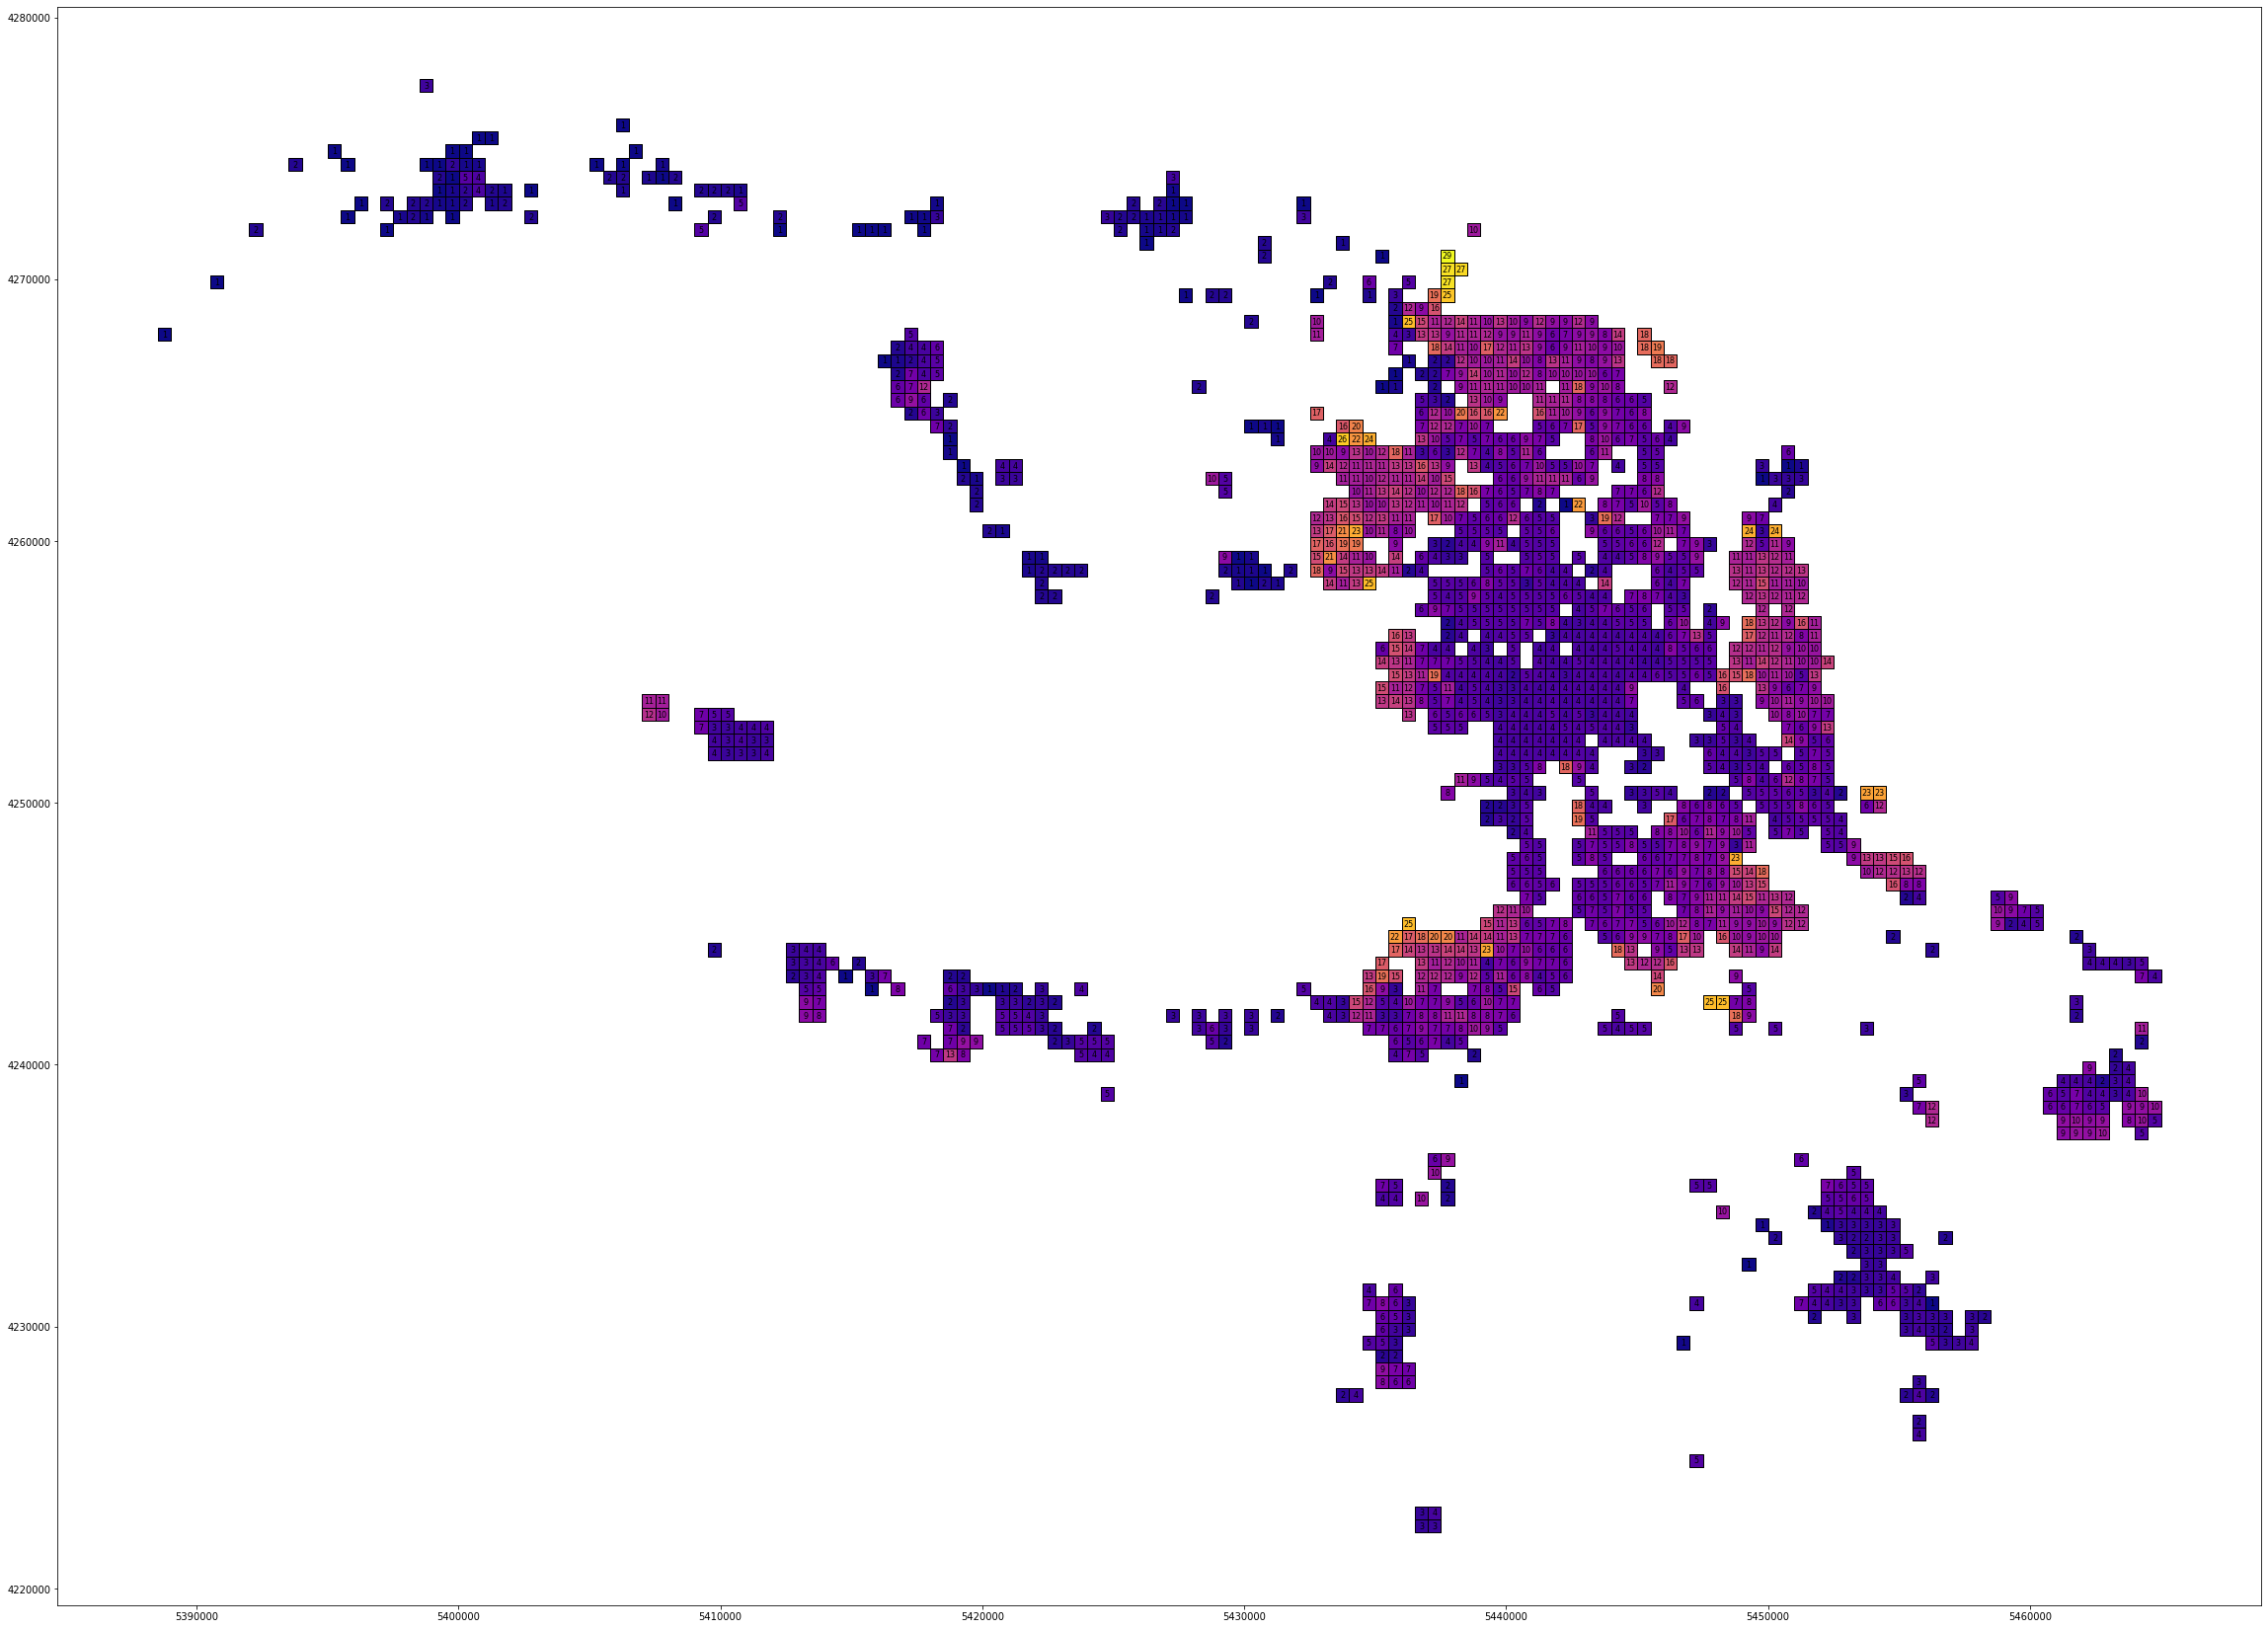

In [19]:
storeys_sum = population.groupby('FID').sum()
storeys_count = population.groupby('FID').count()
storeys_sum['avg_storeys'] = storeys_sum['data_storeys'] / storeys_count['data_storeys']

storeys_sum = municipalities.join(storeys_sum)
storeys_sum = gpd.GeoDataFrame(storeys_sum, geometry='geometry', crs={'init': 'epsg:4326'})
storeys_sum = storeys_sum.to_crs(epsg=3035)
# выводим карту, регулируем размер легенды
fig, ax = plt.subplots(1, 1, figsize=(40, 60))

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%")

storeys_sum['coords'] = storeys_sum['geometry'].apply(lambda x: x.representative_point().coords[:])
storeys_sum['coords'] = [list(coords[0]) for coords in storeys_sum['coords']]

storeys_sum[(storeys_sum['avg_storeys'].notna())].plot(column='avg_storeys', ax=ax, 
                                                cmap='plasma',
                                               edgecolor='k', legend=False)

for idx, row in storeys_sum[(storeys_sum['avg_storeys'].notna())].iterrows():
    try:
        ax.annotate(s=str(int(row['avg_storeys'])), xy=(row['coords'][0], row['coords'][1]), 
                    verticalalignment='center',
                     horizontalalignment='center', fontsize=8,
                     clip_on=True)
    except Exception:
        pass
plt.show()